In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles
import keras
from keras.utils import np_utils
from keras.layers import Dense, Activation
from keras.models import Sequential

In [18]:
X, y = make_circles(n_samples=1000, factor=0.4)
print X.shape, y.shape

(1000, 2) (1000,)


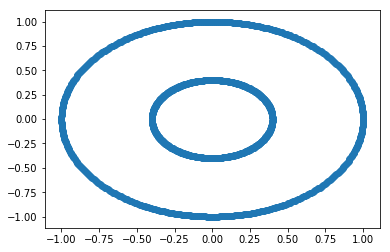

In [19]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

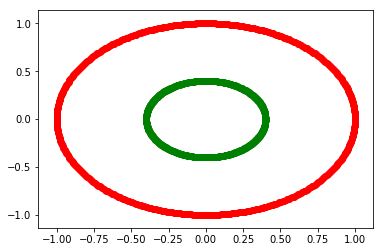

In [21]:
for ix in range(X.shape[0]):
    if y[ix] == 0:
        plt.scatter(X[ix, 0], X[ix, 1], color='red')
    else:
        plt.scatter(X[ix, 0], X[ix, 1], color='green')

plt.show()

In [25]:
Y = np_utils.to_categorical(y)
print Y.shape

for ix in range(10):
    print Y[ix], "---", y[ix]

(1000, 2)
[ 1.  0.] --- 0
[ 1.  0.] --- 0
[ 1.  0.] --- 0
[ 1.  0.] --- 0
[ 1.  0.] --- 0
[ 0.  1.] --- 1
[ 0.  1.] --- 1
[ 1.  0.] --- 0
[ 0.  1.] --- 1
[ 0.  1.] --- 1


In [27]:
split = int(0.8*X.shape[0])
X_train = X[:split,:]
X_test = X[split:,:]

y_train = Y[:split]
y_test = Y[split:]

print X_train.shape

(800, 2)


In [62]:
## NN in keras
model = Sequential()

model.add(Dense(5,input_shape = (2,)))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_19 (Dense)                 (None, 5)             15          dense_input_8[0][0]              
____________________________________________________________________________________________________
activation_11 (Activation)       (None, 5)             0           dense_19[0][0]                   
____________________________________________________________________________________________________
dense_20 (Dense)                 (None, 2)             12          activation_11[0][0]              
____________________________________________________________________________________________________
activation_12 (Activation)       (None, 2)             0           dense_20[0][0]                   
Total params: 27
Trainable params: 27
Non-trainable params: 0
_____________________________

In [54]:
model2 = Sequential()

model2.add(Dense(2, input_shape=(2,)))
for ix in range(5):
    model2.add(Dense(5))
model2.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_9 (Dense)                  (None, 2)             6           dense_input_5[0][0]              
____________________________________________________________________________________________________
dense_10 (Dense)                 (None, 5)             15          dense_9[0][0]                    
____________________________________________________________________________________________________
dense_11 (Dense)                 (None, 5)             30          dense_10[0][0]                   
____________________________________________________________________________________________________
dense_12 (Dense)                 (None, 5)             30          dense_11[0][0]                   
___________________________________________________________________________________________

In [63]:
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
hist = model.fit(X_train, y_train, nb_epoch=100,batch_size=100,verbose=2, shuffle=True ,validation_data=(X_test, y_test))

Train on 800 samples, validate on 200 samples
Epoch 1/100
0s - loss: 0.6746 - acc: 0.4937 - val_loss: 0.6479 - val_acc: 0.5700
Epoch 2/100
0s - loss: 0.6624 - acc: 0.5562 - val_loss: 0.6400 - val_acc: 0.6100
Epoch 3/100
0s - loss: 0.6539 - acc: 0.5675 - val_loss: 0.6335 - val_acc: 0.6300
Epoch 4/100
0s - loss: 0.6469 - acc: 0.6225 - val_loss: 0.6279 - val_acc: 0.6850
Epoch 5/100
0s - loss: 0.6406 - acc: 0.6425 - val_loss: 0.6227 - val_acc: 0.6950
Epoch 6/100
0s - loss: 0.6349 - acc: 0.6562 - val_loss: 0.6178 - val_acc: 0.7000
Epoch 7/100
0s - loss: 0.6297 - acc: 0.6625 - val_loss: 0.6133 - val_acc: 0.7150
Epoch 8/100
0s - loss: 0.6246 - acc: 0.6750 - val_loss: 0.6089 - val_acc: 0.7200
Epoch 9/100
0s - loss: 0.6198 - acc: 0.6838 - val_loss: 0.6048 - val_acc: 0.7250
Epoch 10/100
0s - loss: 0.6152 - acc: 0.6962 - val_loss: 0.6008 - val_acc: 0.7400
Epoch 11/100
0s - loss: 0.6109 - acc: 0.7112 - val_loss: 0.5969 - val_acc: 0.7550
Epoch 12/100
0s - loss: 0.6066 - acc: 0.7238 - val_loss: 0.59

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(X_train, y[:split])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
lr.score(X_test, y[split:])

0.63500000000000001

In [72]:
print type(model)

<class 'keras.models.Sequential'>


TypeError: 'instancemethod' object has no attribute '__getitem__'

In [67]:
data = hist.history
print data

{'acc': [0.49374999478459358, 0.55624999850988388, 0.56749999150633812, 0.62250000238418579, 0.64249999821186066, 0.65625, 0.66249999403953552, 0.67499999701976776, 0.68375000357627869, 0.69624999910593033, 0.71124999970197678, 0.72375000268220901, 0.73375000059604645, 0.74625000357627869, 0.77500000596046448, 0.80499999225139618, 0.82624999433755875, 0.83999999612569809, 0.86499999463558197, 0.86625000089406967, 0.86749999970197678, 0.87124999612569809, 0.87249999493360519, 0.8750000074505806, 0.87749999761581421, 0.89625000208616257, 0.91125001013278961, 0.91625000536441803, 0.92000000923871994, 0.92250000685453415, 0.92500000447034836, 0.92875000089406967, 0.93250001221895218, 0.93374999612569809, 0.93750001490116119, 0.9387499988079071, 0.9400000125169754, 0.94375000149011612, 0.94374999403953552, 0.95500000566244125, 0.96499999612569809, 0.97125000506639481, 0.98625001311302185, 0.99375000596046448, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

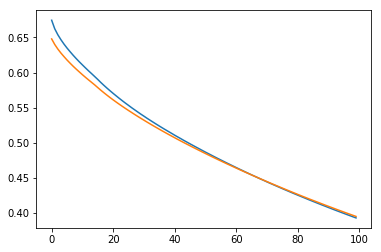

In [69]:
plt.plot(data['loss'])
plt.plot(data['val_loss'])
plt.show()